# Pandas Express - Amir
# TTC-Delays project
Team Members: 

Gaspare Castagna

Amirhossein Heidari

Avery Hoffer

Michael Metallo

In [1]:
import numpy as numpy
import pandas as pd
import os
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [49]:
df_bus_delay=pd.read_csv('bus_delays.csv')
df_bus_delay.head(10000000)

C:\Users\ASuS\AppData\Local\Temp\ipykernel_16204\3754450213.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,analysis
0,95,Wednesday,York Mills station,Mechanical,10.0,20.0,1734.0,2014-01-01 00:23:00,yorkmillsstation
1,102,Wednesday,Entire run for route,General Delay,33.0,66.0,8110.0,2014-01-01 00:55:00,entirerunforroute
2,54,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,7478.0,2014-01-01 01:28:00,Warden Ave at Lawrence Ave East
3,112,Wednesday,Kipling Station,Emergency Services,18.0,36.0,8084.0,2014-01-01 01:30:00,kiplingstation
4,24,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,7843.0,2014-01-01 01:37:00,Ellesmere Rd at Victoria Park Ave
...,...,...,...,...,...,...,...,...,...
588584,32,Saturday,EGLINTON AND EDITH (W,Mechanical,2.0,24.0,1085.0,2022-12-31 23:21:00,Eglinton Ave West at Chiltern Hill Rd
588585,113,Saturday,DANFORTH AND DAWES,Vision,20.0,40.0,8589.0,2022-12-31 23:28:00,Dawes Rd at Danforth Ave North Side
588586,72,Saturday,LOWER SHERBOURNE AND L,Security,18.0,36.0,8493.0,2022-12-31 23:56:00,Lower Sherbourne St at Queens Quay East
588587,22,Saturday,BINGHAM LOOP,Cleaning - Unsanitary,10.0,20.0,8582.0,2022-12-31 00:17:00,binghamloop


In [50]:
import plotly.express as px

Incident_data = df_bus_delay['Incident'].value_counts().reset_index()
Incident_data_major = Incident_data[Incident_data['count'] >= 5000]
Incident_data_2=Incident_data
# Update the 'Incident' column to 'Other' for incidents with less than 5000 counts
Incident_data_2['Incident'] = Incident_data_2.apply(lambda row: 'Other' if row['count'] < 5000 else row['Incident'], axis=1)

# Set the size of the figure using the width and height parameters
fig = px.pie(
    Incident_data_2,
    names='Incident',
    values='count',
    title='Pie Chart Example',
    width=700,
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set1  # Use a more vibrant color palette
)

fig.update_traces(
    texttemplate='',  # Set the text template to an empty string to hide percentages
    marker=dict(line=dict(color='black', width=2))  # Add borders to the pie chart
)

# Customize the text font
fig.update_layout(font=dict(family='Arial', size=18))

fig.show()


C:\Users\ASuS\AppData\Local\Temp\ipykernel_16204\1731111743.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



,month_year,count,month
0,2014-01,9822,1
1,2014-02,8115,2
2,2014-03,8127,3
3,2014-04,7881,4
4,2014-05,8029,5


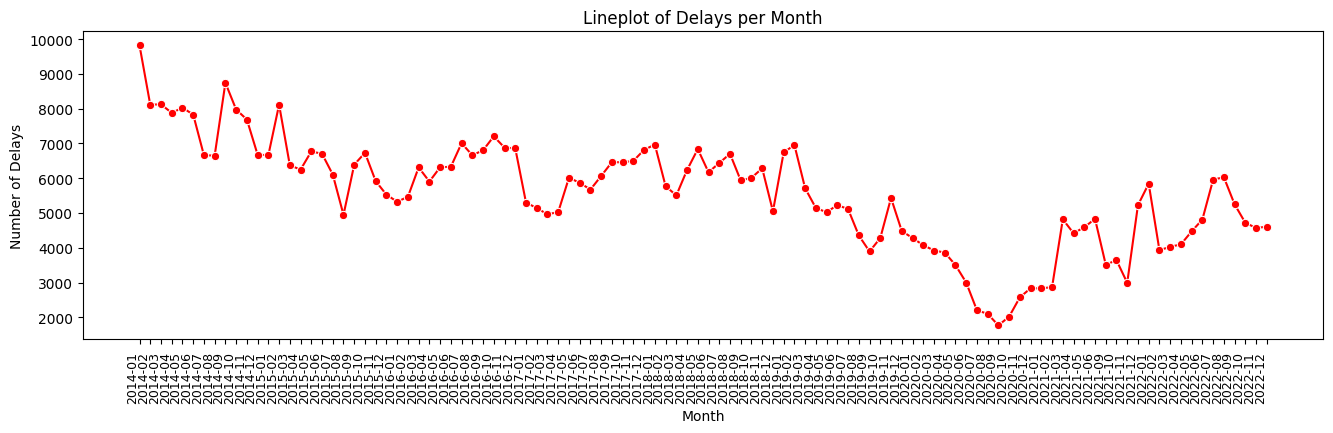

In [51]:

df_bus_delay['DateTime'] = pd.to_datetime(df_bus_delay['DateTime'])
df_bus_delay['just_date'] = df_bus_delay['DateTime'].dt.date
date_delays = df_bus_delay['just_date'].value_counts().reset_index()
date_delays = date_delays.sort_values(by='just_date')


date_delays['just_date'] = pd.to_datetime(date_delays['just_date'])
date_delays['month_year'] = date_delays['just_date'].dt.strftime('%Y-%m')

date_delays_2 = date_delays.groupby('month_year')['count'].sum('count').reset_index()
date_delays_2.columns = ['month_year', 'count']

date_delays_2['month'] = pd.to_datetime(date_delays_2['month_year'])
date_delays_2['month'] = date_delays_2['month'].dt.month


# Plotting
plt.figure(figsize=(16, 4))
ax = sns.lineplot(data=date_delays_2, x='month_year', y='count', color='red', marker='o')
ax.set(title='Lineplot of Delays per Month', xlabel='Month', ylabel='Number of Delays')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)
ax.tick_params(axis='x', which='both', labelsize=9, pad=5)  



date_delays_2.head()

In [52]:
bus_delay = pd.read_csv('bus_delays.csv')
bus_delay.head()

C:\Users\ASuS\AppData\Local\Temp\ipykernel_16204\1692432482.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,analysis
0,95,Wednesday,York Mills station,Mechanical,10.0,20.0,1734.0,2014-01-01 00:23:00,yorkmillsstation
1,102,Wednesday,Entire run for route,General Delay,33.0,66.0,8110.0,2014-01-01 00:55:00,entirerunforroute
2,54,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,7478.0,2014-01-01 01:28:00,Warden Ave at Lawrence Ave East
3,112,Wednesday,Kipling Station,Emergency Services,18.0,36.0,8084.0,2014-01-01 01:30:00,kiplingstation
4,24,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,7843.0,2014-01-01 01:37:00,Ellesmere Rd at Victoria Park Ave


In [53]:
bus_delay['Incident'].unique()

array(['Mechanical', 'General Delay', 'Emergency Services',
       'Investigation', 'Diversion', 'Utilized Off Route',
       'Late Leaving Garage', 'Vision', nan,
       'Late Leaving Garage - Operator',
       'Late Leaving Garage - Mechanical',
       'Late Leaving Garage - Management', 'Late Leaving Garage - Vision',
       'Management', 'Operations - Operator', 'Cleaning', 'Security',
       'Collision - TTC', 'Road Blocked - NON-TTC Collision',
       'Road Block - Non-TTC Collision',
       'Roadblock by Collision - Non-TTC', 'Securitty',
       'Late Entering Service - Mechanical', 'Utilizing Off Route',
       'Held By', 'Late Leaving Garage - Operations', 'e',
       'Late Entering Service', 'Cleaning - Unsanitary',
       'Cleaning - Disinfection'], dtype=object)

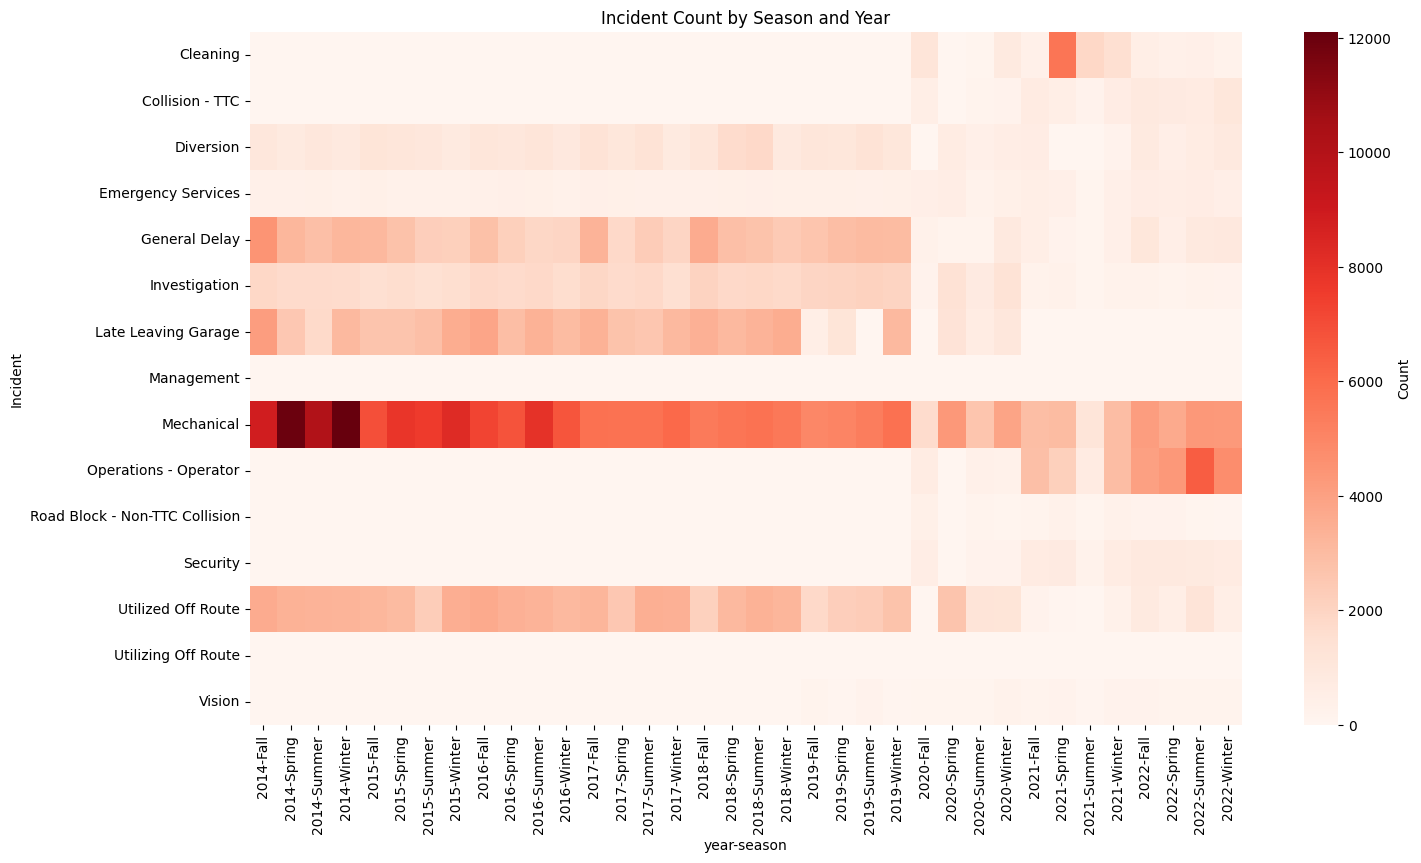

In [59]:
df=bus_delay.copy()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['DateTime'])

# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Define a function to map month to season
def month_to_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df['Incident'] = df['Incident'].replace('Late Leaving Garage - Operator', 'Late Leaving Garage')
df['Incident'] = df['Incident'].replace('Late Leaving Garage - Mechanical', 'Late Leaving Garage')
df['Incident'] = df['Incident'].replace('Late Leaving Garage - Management', 'Late Leaving Garage')
df['Incident'] = df['Incident'].replace('Late Leaving Garage - Operations', 'Operations - Operator')
df['Incident'] = df['Incident'].replace('Late Entering Service - Mechanical', 'Late Leaving Garage')
df['Incident'] = df['Incident'].replace('Late Entering Service', 'Late Leaving Garage')

df['Incident'] = df['Incident'].replace('Held By', 'General Delay')
df['Incident'] = df['Incident'].replace('Cleaning - Unsanitary', 'Cleaning')
df['Incident'] = df['Incident'].replace('Cleaning - Disinfection', 'Cleaning')

df['Incident'] = df['Incident'].replace('Securitty', 'Security')

df['Incident'] = df['Incident'].replace('Road Blocked - NON-TTC Collision', 'Road Block - Non-TTC Collision')
df['Incident'] = df['Incident'].replace('Roadblock by Collision - Non-TTC', 'Road Block - Non-TTC Collision')

df['Incident'] = df['Incident'].replace('Late Leaving Garage - Vision', 'Vision')

# Create a new column for the season
df['season'] = df['month'].apply(month_to_season)

# List of incidents to drop
incidents_to_drop = ['e']

# Drop incidents from the DataFrame
df_filtered = df[~df['Incident'].isin(incidents_to_drop)]

# Pivot table to get counts for each incident in each season and year
pivot_table = df_filtered .pivot_table(index='Incident', columns=['year', 'season'], aggfunc='size', fill_value=0)

# Plot heatmap without annotations
plt.figure(figsize=(16, 9))
sns.heatmap(pivot_table, annot=False, cmap="Reds", cbar_kws={'label': 'Count'})
plt.title('Incident Count by Season and Year')
plt.show()

Delay categories

In [2]:
def categorize_delays(df, short_threshold=5, medium_threshold=15, long_threshold=30):
    """
    Categorize delays in a DataFrame based on specified thresholds.

    Parameters:
    - df: DataFrame
        The input DataFrame containing the 'Min Delay' column.
    - short_threshold: int, optional (default=5)
        Threshold for short delays.
    - medium_threshold: int, optional (default=15)
        Threshold for medium delays.
    - long_threshold: int, optional (default=30)
        Threshold for long delays.

    Returns:
    DataFrame:
        The input DataFrame with an additional 'Delay_Category' column.
    """
    # Create new column 'Delay_Category' based on delay thresholds
    df['Delay_Category'] = pd.cut(df['Min Delay'],
                                  bins=[-float('inf'), short_threshold, medium_threshold, long_threshold, float('inf')],
                                  labels=['Short', 'Medium', 'Long', 'Crippling'])
    
    return df


C:\Users\ASuS\AppData\Local\Temp\ipykernel_16204\2561047268.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



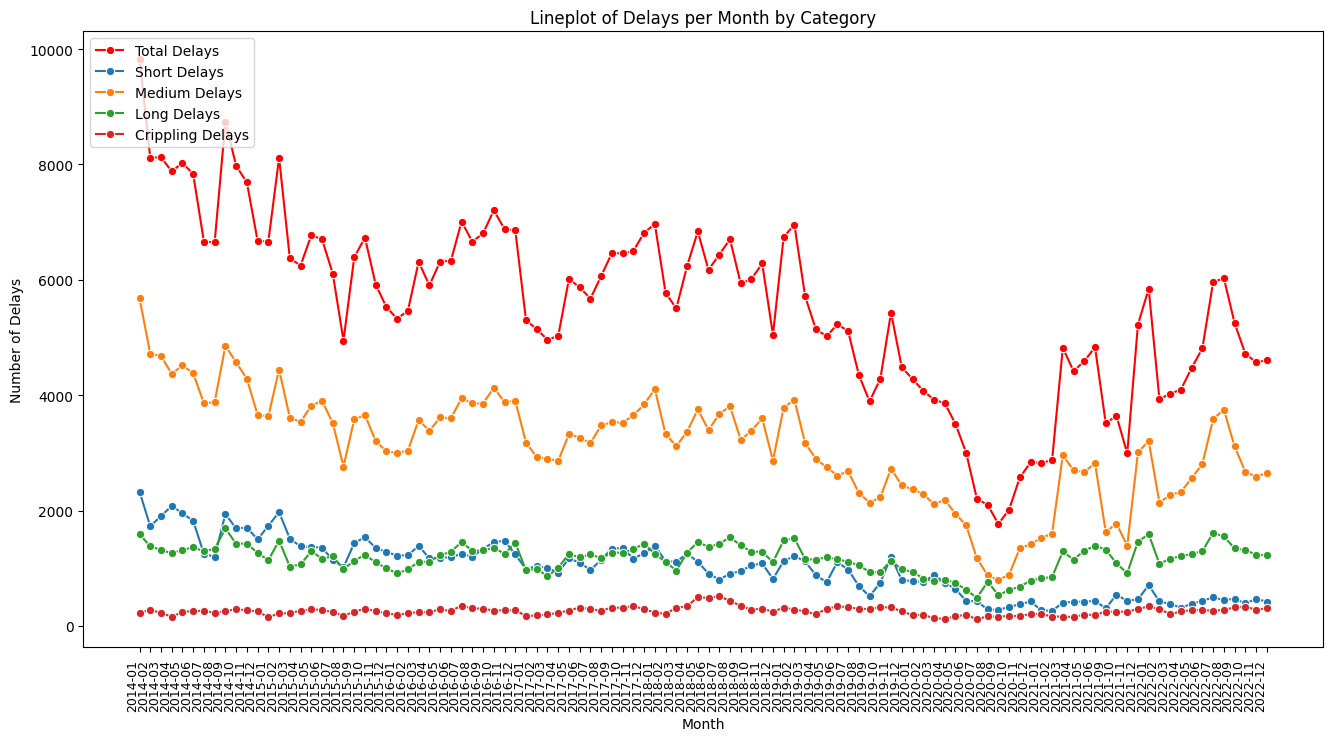

,month_year,Total_Delays,Short,Medium,Long,Crippling
0,2014-01,9822,2330,5680,1589,220
1,2014-02,8115,1728,4719,1382,285
2,2014-03,8127,1907,4680,1316,220
3,2014-04,7881,2079,4373,1262,164
4,2014-05,8029,1955,4516,1317,239


In [65]:
# Assuming df_bus_delay is your DataFrame with 'DateTime' and 'Min Delay' columns
# If your DataFrame has different column names, replace 'DateTime' and 'Min Delay' with the actual column names.
df_bus_delay = bus_delay.copy()
df_bus_delay['DateTime'] = pd.to_datetime(df_bus_delay['DateTime'])

# Extract date and create a new column 'just_date'
df_bus_delay['just_date'] = df_bus_delay['DateTime'].dt.date

# Extract month and year, and create a new column 'month_year'
df_bus_delay['month_year'] = df_bus_delay['DateTime'].dt.strftime('%Y-%m')

#Using categorize_delays 
df_bus_delay_categorized = categorize_delays(df_bus_delay)


# Group by 'month_year' and 'Delay_Category' to count delays in each category for each month
date_delay_categories = df_bus_delay.groupby(['month_year', 'Delay_Category']).size().unstack(fill_value=0).reset_index()

# Group by 'month_year' to calculate total delays for each month
date_total_delays = df_bus_delay.groupby('month_year').size().reset_index(name='Total_Delays')

# Merge the DataFrames on 'month_year'
date_delays_2 = pd.merge(date_total_delays, date_delay_categories, how='left', on='month_year')

# Plotting
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=date_delays_2, x='month_year', y='Total_Delays', color='red', marker='o', label='Total Delays')

# Plot each delay category
for category in ['Short', 'Medium', 'Long', 'Crippling']:
    ax = sns.lineplot(data=date_delays_2, x='month_year', y=category, marker='o', label=f'{category} Delays')

ax.set(title='Lineplot of Delays per Month by Category', xlabel='Month', ylabel='Number of Delays')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)
ax.tick_params(axis='x', which='both', labelsize=9, pad=5)

# Display legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

# Display the resulting DataFrame
date_delays_2.head()

C:\Users\ASuS\AppData\Local\Temp\ipykernel_16204\1710023815.py:3: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\ASuS\AppData\Local\Temp\ipykernel_16204\1710023815.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



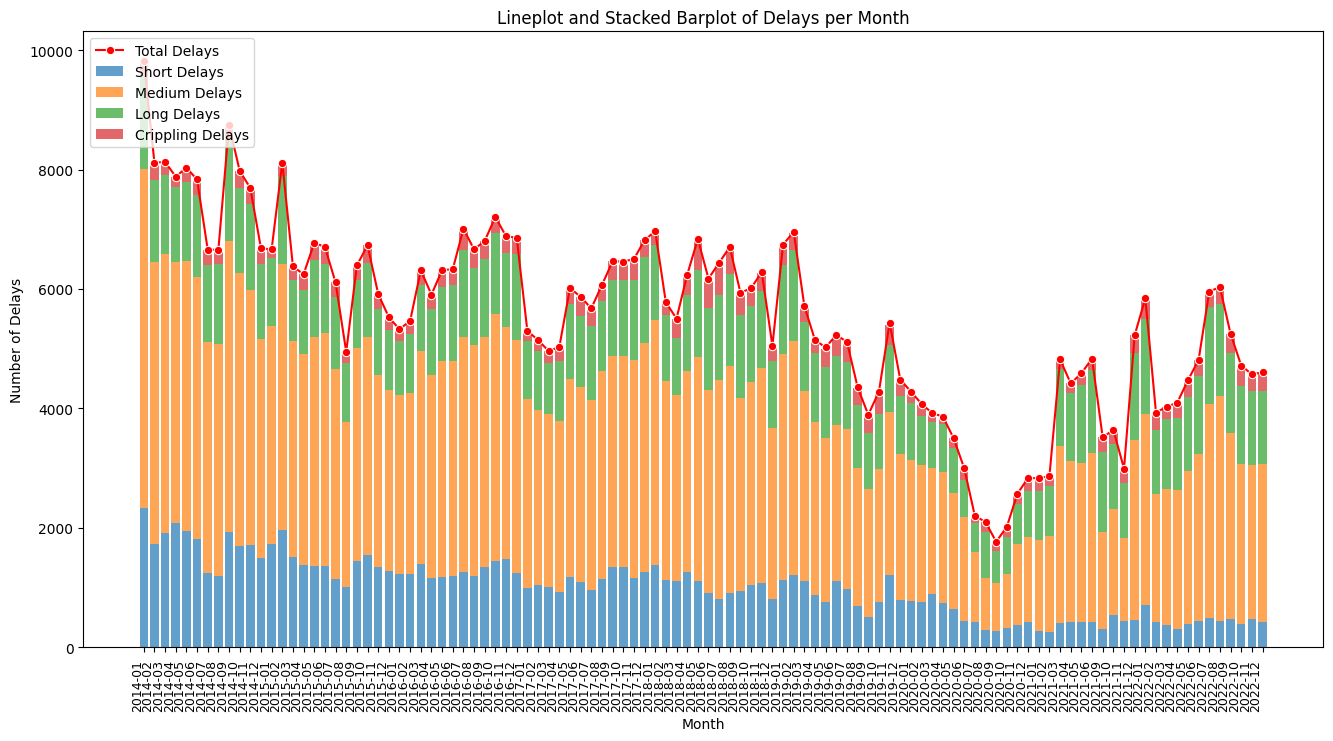

In [ ]:
# Assuming df_bus_delay is your DataFrame with 'DateTime' and 'Min Delay' columns
# If your DataFrame has different column names, replace 'DateTime' and 'Min Delay' with the actual column names.
df_bus_delay = pd.read_csv('df_bus_delaycheck.csv')
df_bus_delay['DateTime'] = pd.to_datetime(df_bus_delay['DateTime'])

# Extract month and year, and create a new column 'month_year'
df_bus_delay['month_year'] = df_bus_delay['DateTime'].dt.strftime('%Y-%m')

# Define the delay thresholds
short_threshold = 5
medium_threshold = 15
long_threshold = 30

# Create new column 'Delay_Category' based on delay thresholds
df_bus_delay['Delay_Category'] = pd.cut(df_bus_delay['Min Delay'],
                                       bins=[-float('inf'), short_threshold, medium_threshold, long_threshold, float('inf')],
                                       labels=['Short', 'Medium', 'Long', 'Crippling'])

# Group by 'month_year' and 'Delay_Category' to count delays in each category for each month
date_delay_categories = df_bus_delay.groupby(['month_year', 'Delay_Category']).size().unstack(fill_value=0).reset_index()

# Group by 'month_year' to calculate total delays for each month
date_total_delays = df_bus_delay.groupby('month_year').size().reset_index(name='Total_Delays')

# Merge the DataFrames on 'month_year'
date_delays_2 = pd.merge(date_total_delays, date_delay_categories, how='left', on='month_year')

# Plotting
plt.figure(figsize=(16, 8))

# Line chart for total delays
ax = sns.lineplot(data=date_delays_2, x='month_year', y='Total_Delays', color='red', marker='o', label='Total Delays')

# Stacked bar chart for delay categories
categories = ['Short', 'Medium', 'Long', 'Crippling']
bottom_values = [0] * len(date_delays_2)

for category in categories:
    if category in date_delays_2.columns:
        ax.bar(date_delays_2['month_year'], date_delays_2[category], label=f'{category} Delays', alpha=0.7, bottom=bottom_values)
        bottom_values += date_delays_2[category]

ax.set(title='Lineplot and Stacked Barplot of Delays per Month',
       xlabel='Month', ylabel='Number of Delays')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)
ax.tick_params(axis='x', which='both', labelsize=9, pad=5)

# Display legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

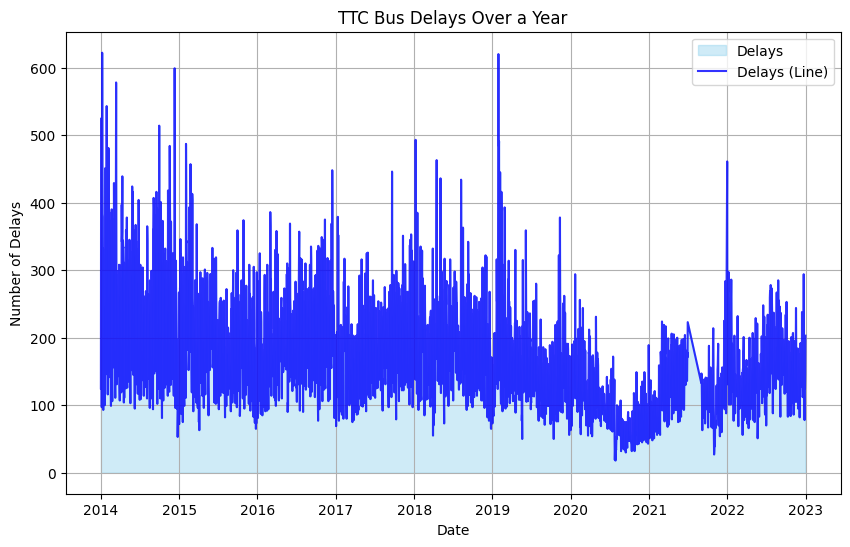

In [ ]:
date_delays.head()

# Sort the DataFrame by date if it's not already sorted
date_delays = date_delays.sort_values(by='just_date')

# Plotting the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(date_delays['just_date'], date_delays['count'], color='skyblue', alpha=0.4, label='Delays')
plt.plot(date_delays['just_date'], date_delays['count'], color='blue', alpha=0.8, label='Delays (Line)')
plt.xlabel('Date')
plt.ylabel('Number of Delays')
plt.title('TTC Bus Delays Over a Year')
plt.legend()
plt.grid(True)
plt.show()

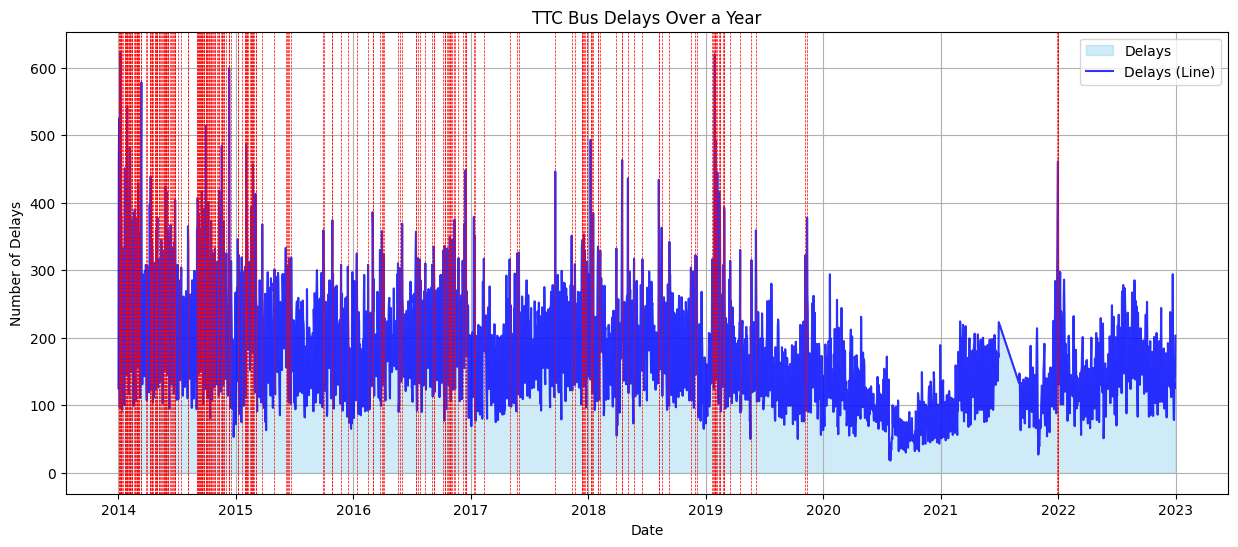

In [ ]:
# Assuming your DataFrame is named date_delays
# Ensure 'just_date' is in datetime format
date_delays['just_date'] = pd.to_datetime(date_delays['just_date'])

# Sort the DataFrame by date if it's not already sorted
date_delays = date_delays.sort_values(by='just_date')

# Plotting the area chart
plt.figure(figsize=(15, 6))

# Fill the area with skyblue color for all days
plt.fill_between(date_delays['just_date'], date_delays['count'], color='skyblue', alpha=0.4, label='Delays')

# Plot the line in blue for all days
plt.plot(date_delays['just_date'], date_delays['count'], color='blue', alpha=0.8, label='Delays (Line)')

# Identify and draw a vertical line in red for days with more than 100 delays
high_delay_days = date_delays[date_delays['count'] > 300]
for date in high_delay_days['just_date']:
    plt.axvline(date, color='red', linestyle='--', linewidth=0.5)

plt.xlabel('Date')
plt.ylabel('Number of Delays')
plt.title('TTC Bus Delays Over a Year')
plt.legend()
plt.grid(True)
plt.show()

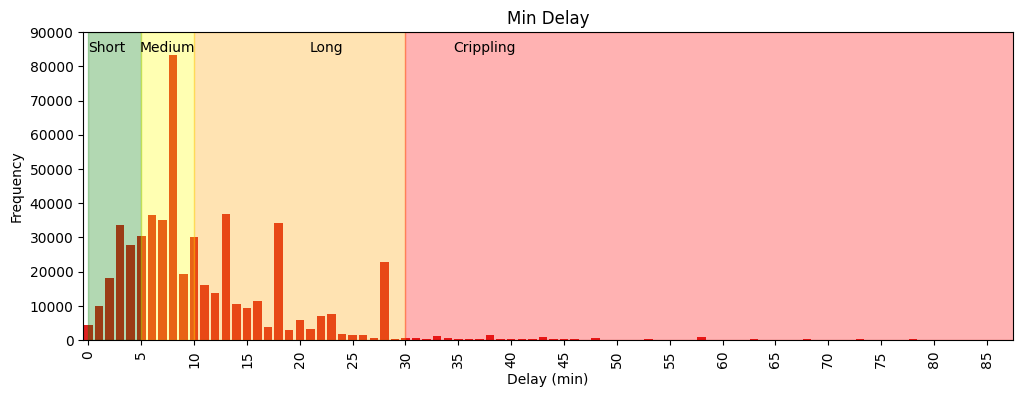

,Min Delay,count
23,2.0,4449
18,3.0,9931
12,4.0,18269
5,5.0,33637
9,6.0,27867
...,...,...
67,85.0,147
110,86.0,70
105,87.0,76
119,88.0,62


In [ ]:
df_duration = df_bus_delay['Min Delay'].value_counts().reset_index()
df_duration = df_duration[(df_duration['Min Delay'] > 1) & (df_duration['Min Delay'] < 90)]
df_duration = df_duration.sort_values(by='Min Delay')

plt.figure(figsize=(12, 4))
ax = sns.barplot(data=df_duration, x='Min Delay', y='count', color='red')
ax.set(title='Min Delay', xlabel='Delay (min)', ylabel='Frequency')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set x-axis ticks for every 5 minutes
xticks = np.arange(0, 90, 5)
ax.set_ylim(0, 90000)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=90)


# Add regions for short, medium, long, and crippling waiting times
ax.axvspan(0, 5, alpha=0.3, color='green', label='Short')
ax.axvspan(5, 10, alpha=0.3, color='yellow', label='Medium')
ax.axvspan(10, 30, alpha=0.3, color='orange', label='Long')
ax.axvspan(30, 90, alpha=0.3, color='red', label='Crippling')

# Add labels inside the regions
ax.text(1.75, ax.get_ylim()[1] * 0.95, 'Short', ha='center', va='center', color='black')
ax.text(7.5, ax.get_ylim()[1] * 0.95, 'Medium', ha='center', va='center', color='black')
ax.text(22.5, ax.get_ylim()[1] * 0.95, 'Long', ha='center', va='center', color='black')
ax.text(37.5, ax.get_ylim()[1] * 0.95, 'Crippling', ha='center', va='center', color='black')

# Set x-axis limit explicitly to remove gaps
ax.set_xlim(-0.5, len(df_duration) - 0.5)

plt.show()
df_duration.head(1000)

In [ ]:
df_bus_delay['Route'] = pd.to_numeric(df_bus_delay['Route'], errors='coerce')
# Drop rows where 'Route' is NaN
df_bus_delay.dropna(subset=['Route'], inplace=True)

df_routes = df_bus_delay['Route'].value_counts().reset_index()
df_routes = df_routes[df_routes['count']>100]
df_routes = df_routes.sort_values(by='count',ascending=False)
#df_routes.head()
df_routes_top20=df_routes.head(21)

df_routes_top20['Route'] = df_routes_top20['Route'].astype(str)  # Convert 'Route' to string
df_routes_top20 = df_routes_top20.sort_values(by='count', ascending=False)  # Sort by count
df_routes_top20.head(11)



C:\Users\ASuS\AppData\Local\Temp\ipykernel_7096\775986200.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Route,count
0,29.0,16007
1,52.0,15424
2,32.0,15110
3,36.0,14000
4,54.0,12825
5,53.0,11990
6,95.0,11603
7,60.0,11168
8,35.0,11148
9,102.0,10595


In [ ]:

list_avoidable = ['Late Leaving Garage','Cleaning','Late Entering Service','Cleaning - Unsanitary','Cleaning - Disinfection', 'Late Leaving Garage - Operations','Late Leaving Garage - Management','Investigation']
df_delays_avoidable=df_bus_delay[df_bus_delay['Incident'].isin(list_avoidable)]
df_delays_avoidable.head()
print(df_delays_avoidable['Incident'].unique())

# Count the frequency of each incident
df_delays_avoidable_count = df_delays_avoidable['Incident'].value_counts().reset_index()
df_delays_avoidable_count.head()
# Create a doughnut chart using plotly
fig = px.pie(df_delays_avoidable_count, names='Incident', values='count', title='Frequency of Incidents', hole=0.4, width=1200, height=700,
             color_discrete_sequence=px.colors.qualitative.Set2
             )

# Manually add text labels with both percent and label
fig.update_traces(textinfo='percent+label', 
                  customdata=df_delays_avoidable_count['Incident'],
                  hovertemplate='%{label}: %{percent}<br>Count: %{value}<br>Custom Data: %{customdata}'
                 )

# Customize the text font
fig.update_layout(font=dict(family='Arial', size=18))

fig.update_traces(
    texttemplate='',  # Set the text template to an empty string to hide percentages
    marker=dict(line=dict(color='black', width=2))  # Add borders to the pie chart
)

# Show the plot
fig.show()

['Investigation' 'Late Leaving Garage' 'Late Leaving Garage - Management'
 'Cleaning' 'Late Leaving Garage - Operations' 'Late Entering Service'
 'Cleaning - Unsanitary' 'Cleaning - Disinfection']


In [ ]:
# Define the bins and labels for different delay types
bins = [0, 5, 10, 30, float('inf')]  # bin edges
labels = ['short', 'medium', 'long', 'crippling']

# Create the 'Delay Type' column using pd.cut
df_bus_delay['Delay Type'] = pd.cut(df_bus_delay['Min Delay'], bins=bins, labels=labels, right=False)
df_bus_delay.head()

,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,Incident ID,DateTime,month_year,Delay_Category,Delay Type
0,95.0,Wednesday,York Mills station,Mechanical,10.0,20.0,1734.0,NaN,2014-01-01 00:23:00,2014-01,Medium,long
1,102.0,Wednesday,Entire run for route,General Delay,33.0,66.0,8110.0,NaN,2014-01-01 00:55:00,2014-01,Crippling,crippling
2,54.0,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,7478.0,NaN,2014-01-01 01:28:00,2014-01,Medium,long
3,112.0,Wednesday,Kipling Station,Emergency Services,18.0,36.0,8084.0,NaN,2014-01-01 01:30:00,2014-01,Long,long
4,24.0,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,7843.0,NaN,2014-01-01 01:37:00,2014-01,Medium,long


In [ ]:
# Define the bins and labels for different delay types
bins = [0, 5, 10, 30, float('inf')]
labels = ['short', 'medium', 'long', 'crippling']

# Create the 'Delay Type' column using pd.cut
df_bus_delay['Delay Type'] = pd.cut(df_bus_delay['Min Delay'], bins=bins, labels=labels, right=False)

# Group by 'Day' and 'Delay Type', and aggregate 'Min Delay' with mean and count
df_weekday_data_1 = df_bus_delay.groupby(['Day', 'Delay Type'])['Min Delay'].agg(['mean', 'count']).unstack('Delay Type').reset_index()

# Flatten the multi-level column index and reset column names
df_weekday_data_1.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df_weekday_data_1.columns]

df_weekday_data_2 = df_bus_delay.groupby('Day')['Min Delay'].agg(mean_min_delay='mean', count_min_delay='count').reset_index()

df_weekday_data= pd.merge(df_weekday_data_1, df_weekday_data_2, on='Day')

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to Categorical with the specified order
df_weekday_data['Day'] = pd.Categorical(df_weekday_data['Day'], categories=day_order, ordered=True)

# Sort the DataFrame based on the 'Day' column
df_weekday_data = df_weekday_data.sort_values(by='Day')

df_weekday_data.head(10)

,Day,mean_short,mean_medium,mean_long,mean_crippling,count_short,count_medium,count_long,count_crippling,mean_min_delay,count_min_delay
1,Monday,2.004648,7.037106,14.564832,115.752846,11187,25791,43721,6676,18.465540,87376
5,Tuesday,2.007321,7.009237,14.634650,121.979618,12839,28904,48110,7065,18.512531,96919
6,Wednesday,1.999201,7.016775,14.695167,121.862402,12523,28555,49181,7144,18.670554,97406
4,Thursday,1.984667,7.035373,14.756103,112.627353,12783,28440,50054,7385,18.201648,98662
0,Friday,2.020999,7.039545,14.667901,116.712409,12096,27892,49148,7535,18.837711,96673
2,Saturday,1.605808,7.316169,14.854778,153.801339,5992,14410,32929,7319,28.521591,60651
3,Sunday,1.656624,7.353243,14.839945,104.025223,5178,9744,28234,7176,24.748162,50334


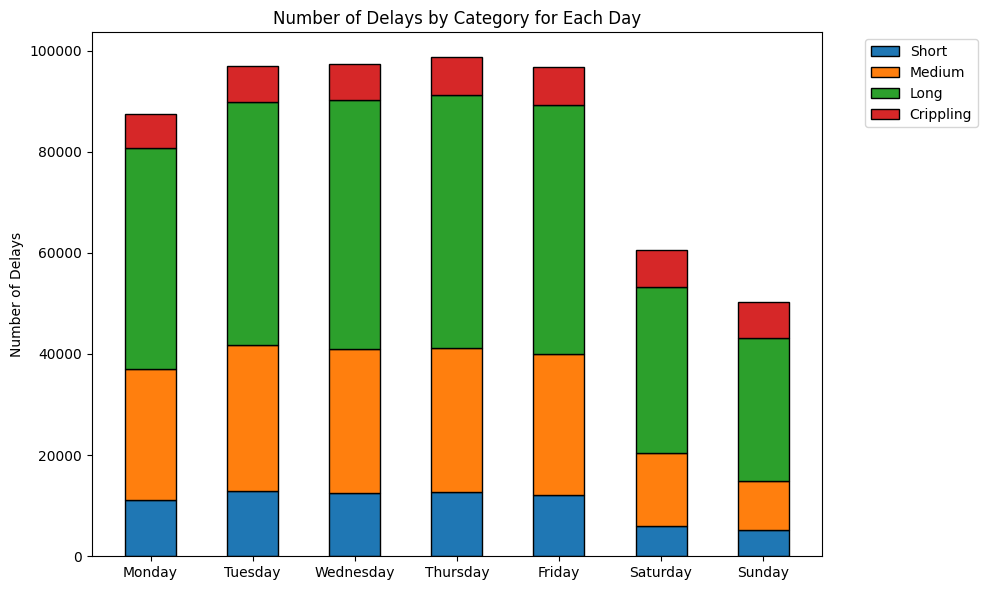

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for counts of short, medium, long, crippling with adjusted x positions
bar_width = 0.5  # Adjust the width as needed
bar_positions = np.arange(1, len(df_weekday_data) + 1)

# Bar plot for counts of short, medium, long, crippling
ax.bar(bar_positions , df_weekday_data['count_short'], width=bar_width, label='Short', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_medium'], bottom=df_weekday_data['count_short'], width=bar_width, label='Medium', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_long'], bottom=df_weekday_data['count_short'] + df_weekday_data['count_medium'], width=bar_width, label='Long', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_crippling'], bottom=df_weekday_data['count_short'] + df_weekday_data['count_medium'] + df_weekday_data['count_long'], width=bar_width, label='Crippling', edgecolor='black')

# Customize the plot
ax.set_ylabel('Number of Delays')
ax.set_title('Number of Delays by Category for Each Day')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_weekday_data['Day'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the chart border

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
# Group by 'Route' and 'Delay Type', and aggregate 'Min Delay' with mean and count
df_routes_1 = df_bus_delay.groupby(['Route', 'Delay Type'])['Min Delay'].agg(['mean', 'count']).unstack('Delay Type').reset_index()
# Flatten the multi-level column index and reset column names
df_routes_1.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df_routes_1.columns]

df_routes_2 = df_bus_delay.groupby('Route')['Min Delay'].agg(mean_min_delay='mean', count_min_delay='count').reset_index()

df_routes= pd.merge(df_routes_1, df_routes_2, on='Route')

# Sort the DataFrame based on the 'count_min_delay' column
df_routes = df_routes.sort_values(by='count_min_delay',ascending=False )
df_routes_top20=df_routes.head(20)
df_routes_top20.head()

,Route,mean_short,mean_medium,mean_long,mean_crippling,count_short,count_medium,count_long,count_crippling,mean_min_delay,count_min_delay
28,29.0,3.253047,6.802518,13.003509,151.777778,5169,7783,2280,765,13.472339,15997
51,52.0,1.805310,6.848276,15.529952,114.909465,904,2030,11752,729,18.281609,15415
31,32.0,1.580559,7.046005,12.336760,121.307985,751,5782,7783,789,15.468785,15105
35,36.0,2.978391,5.915137,14.342548,117.797323,1666,8661,3147,523,11.640852,13997
53,54.0,1.425304,7.125162,13.730331,112.742952,1399,3092,7728,603,15.451334,12822


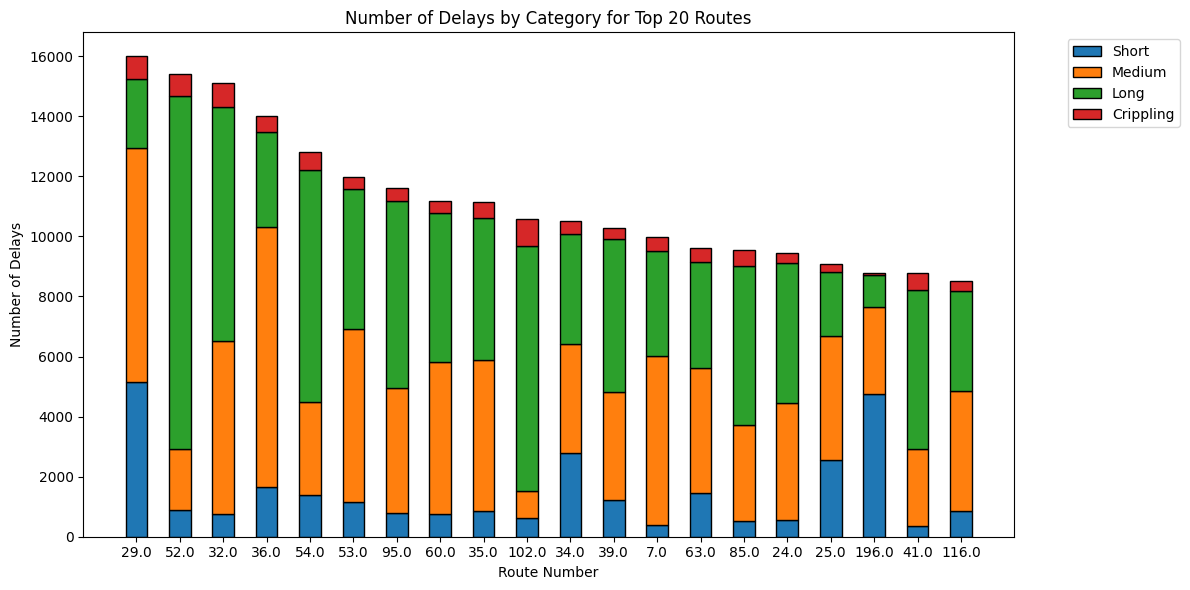

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for counts of short, medium, long, crippling with adjusted x positions
bar_width = 0.5  # Adjust the width as needed
bar_positions = np.arange(1, len(df_routes_top20) + 1)

# Bar plot for counts of short, medium, long, crippling
ax.bar(bar_positions , df_routes_top20['count_short'], width=bar_width, label='Short', edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_medium'], bottom=df_routes_top20['count_short'], width=bar_width, label='Medium',edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_long'], bottom=df_routes_top20['count_short'] + df_routes_top20['count_medium'], width=bar_width, label='Long',edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_crippling'], bottom=df_routes_top20['count_short'] + df_routes_top20['count_medium'] + df_routes_top20['count_long'], width=bar_width, label='Crippling',edgecolor='black')

# Customize the plot
ax.set_ylabel('Number of Delays')
ax.set_xlabel('Route Number')
ax.set_title('Number of Delays by Category for Top 20 Routes')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_routes_top20['Route'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the chart border

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

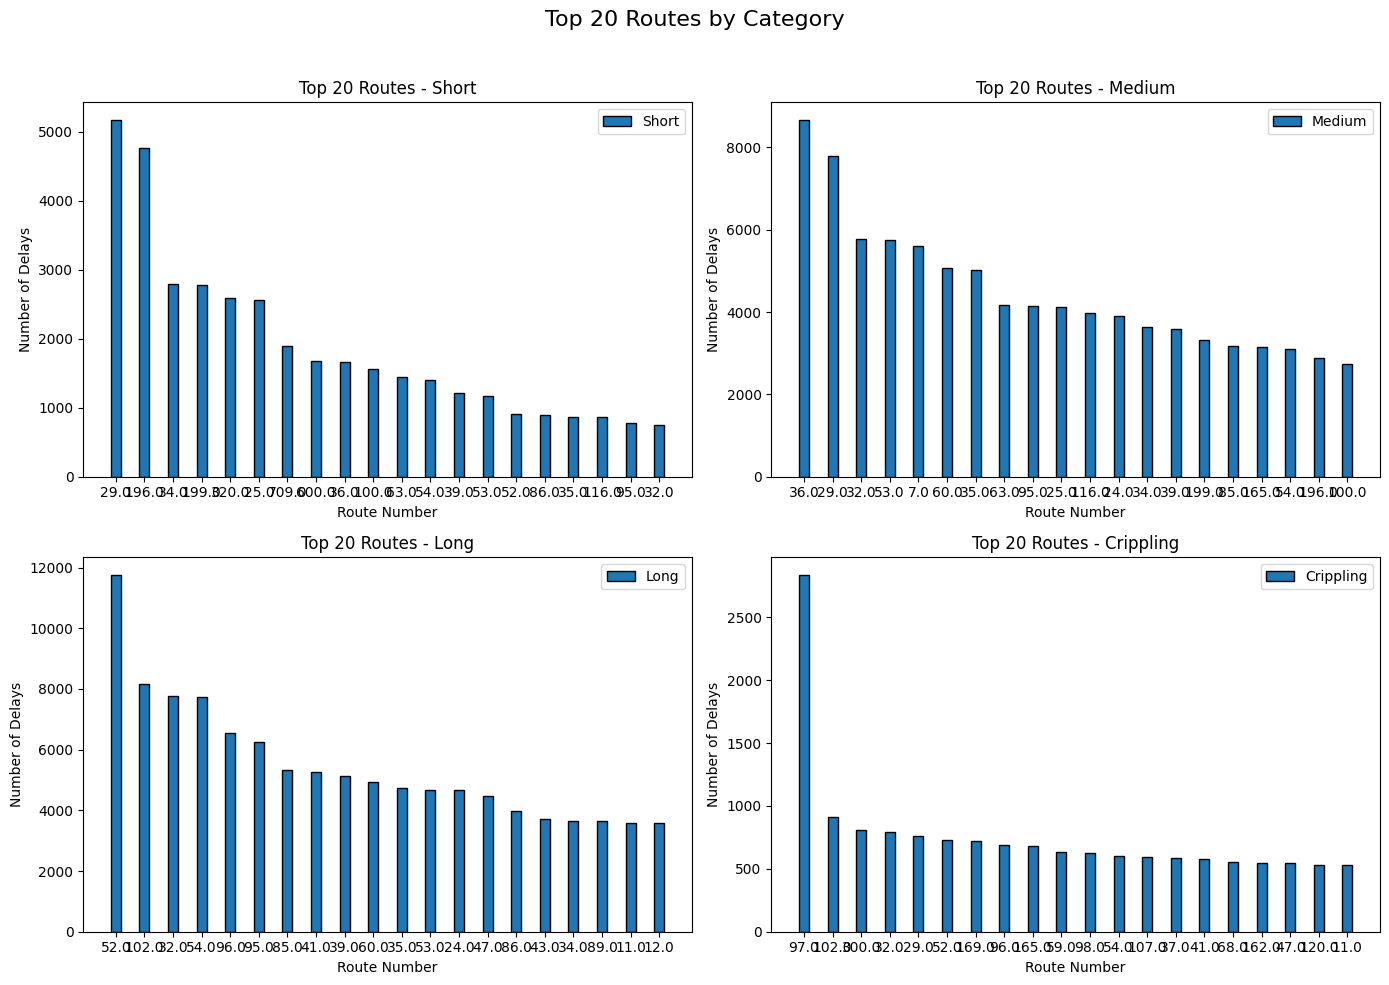

In [19]:
df_routes.head()
df_routes_short_top20=df_routes.sort_values(by='count_short',ascending=False ).head(20)
df_routes_medium_top20=df_routes.sort_values(by='count_medium',ascending=False ).head(20)
df_routes_long_top20=df_routes.sort_values(by='count_long',ascending=False ).head(20)
df_routes_crippling_top20=df_routes.sort_values(by='count_crippling',ascending=False ).head(20)

df_routes_top20_list = [df_routes_short_top20, df_routes_medium_top20, df_routes_long_top20, df_routes_crippling_top20]
categories = ['Short', 'Medium', 'Long', 'Crippling']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=False, sharey=False)
fig.suptitle('Top 20 Routes by Category', fontsize=16)

# Define bar width and positions
bar_width = 0.35
bar_positions = np.arange(20)

for i, (df_routes_top20, category) in enumerate(zip(df_routes_top20_list, categories)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Bar plot for counts of short, medium, long, crippling
    ax.bar(bar_positions, df_routes_top20['count_' + category.lower()], width=bar_width, label=category, edgecolor='black')

    # Customize the plot
    ax.set_ylabel('Number of Delays')
    ax.set_xlabel('Route Number')
    ax.set_title(f'Top 20 Routes - {category}')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(df_routes_top20['Route'])
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [41]:
all_data = pd.read_csv('all_data.csv')

C:\Users\ASuS\AppData\Local\Temp\ipykernel_13944\159048599.py:1: DtypeWarning: Columns (1,19) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('all_data.csv')


In [42]:
weather_delay=all_data.copy()
weather_delay = categorize_delays(weather_delay)

In [49]:
weather_2015=weather_delay[weather_delay['UTC_YEAR']==2015]
weather_2015.head()

,Unnamed: 0.1,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,analysis,...,UTC_YEAR,WIND_SPEED,LOCAL_DAY,DEW_POINT_TEMP,LOCAL_MONTH,UTC_DATE,VISIBILITY,weather,time_deviation,Delay_Category
94184,94184,45,Wednesday,Kipling station,Mechanical,9.0,18.0,7309.0,2014-12-31 19:29:00,kiplingstation,...,2015,41.0,31,-11.2,12,2015-01-01T00:00:00,16.1,snow,0 days,Medium
94185,94185,26,Wednesday,Jane/Ardagh,Mechanical,20.0,40.0,8031.0,2014-12-31 19:12:00,janeardagh,...,2015,41.0,31,-11.2,12,2015-01-01T00:00:00,16.1,snow,0 days,Long
94186,94186,52,Wednesday,Westway and Martingrove,Mechanical,16.0,31.0,1649.0,2014-12-31 18:41:00,Martin Grove Rd at The Westway,...,2015,41.0,31,-11.2,12,2015-01-01T00:00:00,16.1,snow,0 days,Long
94187,94187,86,Wednesday,Kingston Rd. and Lawrence,Mechanical,15.0,30.0,7526.0,2014-12-31 18:50:00,Lawrence Ave East at Kingston Rd,...,2015,41.0,31,-11.2,12,2015-01-01T00:00:00,16.1,snow,0 days,Medium
94188,94188,35,Wednesday,Arrow Garage,Investigation,0.0,0.0,1387.0,2014-12-31 19:30:00,arrowgarage,...,2015,46.0,31,-11.3,12,2015-01-01T01:00:00,16.1,snow,0 days,Short


In [60]:

# Extract month from the 'Date' column
weather_2015['month'] = pd.to_datetime(weather_2015['DateTime']).dt.month

# Group by month and calculate the average delay and temperature
monthly_avg = weather_2015.groupby('month').agg({
    'Min Delay': 'sum',  # Change 'sum' to 'mean' for average
    'TEMP': 'mean',       # Change 'sum' to 'mean' for average
    'DateTime': 'first'       # Use 'first' to get the date of the first day in the month
}).reset_index()

# Rename columns for clarity
monthly_avg = monthly_avg.rename(columns={'Min Delay': 'Sum Delay', 'TEMP': 'Average Temperature'})

# Display the new DataFrame
monthly_avg.head(20)

C:\Users\ASuS\AppData\Local\Temp\ipykernel_13944\2362455964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_2015['month'] = pd.to_datetime(weather_2015['DateTime']).dt.month


,month,Sum Delay,Average Temperature,DateTime
0,1,84132.0,-6.535849,2015-01-01 00:18:00
1,2,115376.0,-10.710103,2015-02-01 00:01:00
2,3,121202.0,-1.239978,2015-03-01 01:18:00
3,4,125816.0,7.144939,2015-04-01 00:01:00
4,5,133065.0,13.825548,2015-05-01 00:00:00
5,6,117012.0,16.942881,2015-06-01 01:25:00
6,7,91150.0,21.502620,2015-07-01 00:18:00
7,8,91802.0,20.289268,2015-08-01 00:00:00
8,9,117627.0,19.977800,2015-09-01 00:09:00
9,10,126040.0,10.952748,2015-10-01 00:06:00


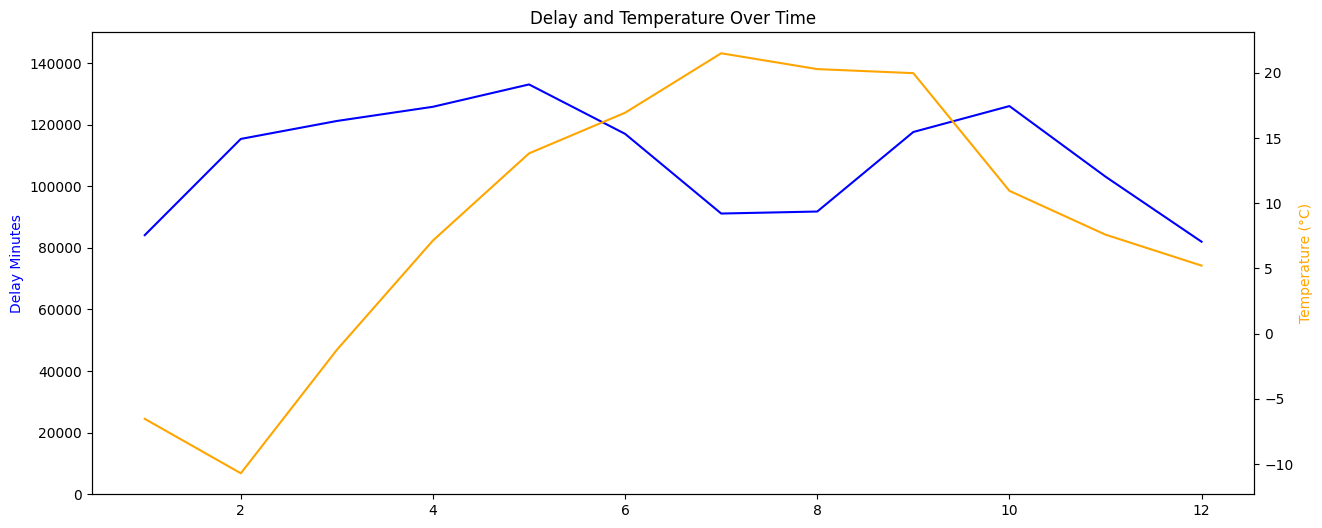

In [63]:
plt.figure(figsize=(15, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(monthly_avg['month'], monthly_avg['Sum Delay'], color='blue', label='Delay')
ax2.plot(monthly_avg['month'], monthly_avg['Average Temperature'], color='orange', label='Temperature (°C)')

ax1.set_ylabel('Delay Minutes', color='blue')
ax2.set_ylabel('Temperature (°C)', color='orange')

# Set the y-axis limit for delays
ax1.set_ylim([0, 150000])

plt.title('Delay and Temperature Over Time')
plt.show()